<a href="https://colab.research.google.com/github/YuvBindal/NUS-SDS-Datathon-Champion/blob/main/DATA_DESTROYERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [3]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

# Data Cleaning

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
file_path = '/content/drive/My Drive/catA_train.csv'
dataset = pd.read_csv(file_path)
dataset.head()


,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


In [54]:
dataset.shape

(29182, 28)

In [55]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [56]:
dataset.isna().sum()


LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [57]:
dataset = dataset.drop('Square Footage', axis = 1)

In [58]:
dataset = dataset.dropna(subset = ['LATITUDE', 'LONGITUDE', 'Employees (Domestic Ultimate Total)'])

In [59]:
(dataset['Employees (Single Site)'] > dataset['Employees (Domestic Ultimate Total)']).sum() + (dataset['Employees (Single Site)'] > dataset['Employees (Global Ultimate Total)']).sum()


12038

In [60]:
dataset['Employees (Global)'] = dataset[['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)']].max(axis = 1)


In [61]:
dataset.drop(columns = ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)', 'Fiscal Year End'], inplace = True)

In [63]:
dataset['Import/Export Status'].fillna('N/A', inplace = True)

In [66]:
dataset = dataset[dataset['Company Status (Active/Inactive)'] == 'Active']


In [68]:
dataset.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Company Status (Active/Inactive),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Employees (Global)
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,Active,2.209224e+06,4.637871e+06,N/A,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,25.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,Active,7.093536e+09,7.093536e+09,N/A,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,100.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,Active,1.026308e+06,1.026308e+06,N/A,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,4.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,Active,7.339898e+10,7.339898e+10,N/A,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,100.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,Active,4.322130e+05,4.322130e+05,Exports,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,4.0


# Placeholders

<ipython-input-69-0103152c89c5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = dataset.corr()


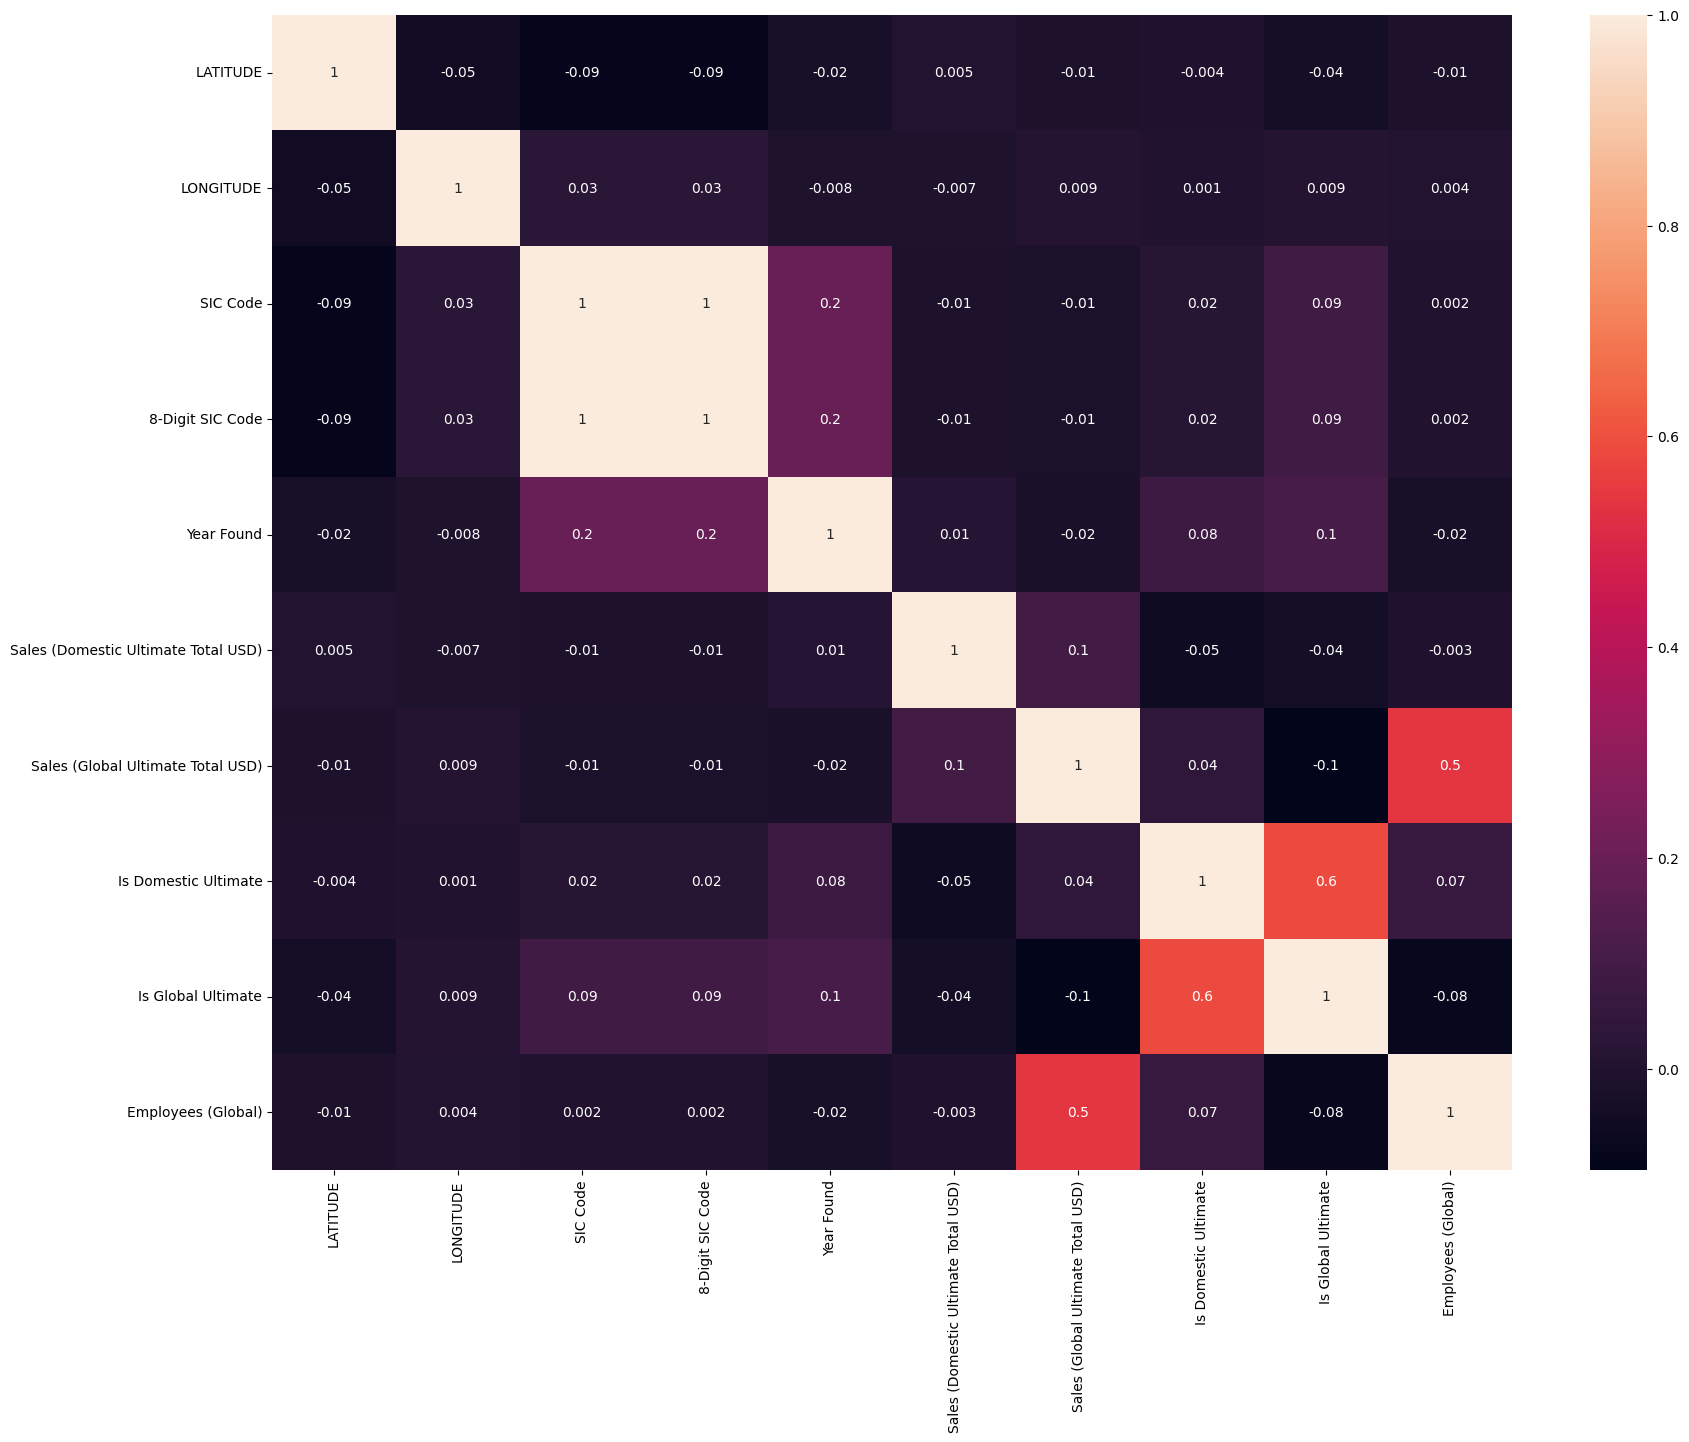

In [69]:
#correlation heatmap to identify significant columns
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = dataset.corr()
figure=plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True,fmt=".1g")
plt.show()

In [72]:
#1. Adding "not applicable" to import/export status of companies that do not import/export
def update_import_export_status(row):
    if pd.isna(row['Import/Export Status']):
        return 'not applicable'
    else:
        return row['Import/Export Status']

dataset['Import/Export Status'] = dataset.apply(update_import_export_status, axis=1)

In [73]:
dataset.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Company Status (Active/Inactive),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Employees (Global)
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,Active,2.209224e+06,4.637871e+06,N/A,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,25.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,Active,7.093536e+09,7.093536e+09,N/A,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,100.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,Active,1.026308e+06,1.026308e+06,N/A,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,4.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,Active,7.339898e+10,7.339898e+10,N/A,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,100.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,Active,4.322130e+05,4.322130e+05,Exports,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,4.0


In [14]:
#dropping fiscal year end
dataset.drop(columns=['Fiscal Year End'], inplace=True)


In [34]:
#Webscraping dataset
from pprint import pprint
import requests
from bs4 import BeautifulSoup

list_countries = list(dataset['Global Ultimate Country'].unique())
scraped_gdps = {}

def google_search(query):
    url = f"https://www.google.com/search?q={query} gdp per capita"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Content-Type': 'application/json', 'Accept-Encoding': 'deflate'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve search results. Status code: {response.status_code}")
        return None

def extract_figure_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the element with class "ayqGOc" and extract the text
    figure_element = soup.find('div', class_='ayqGOc')

    if figure_element:
        figure_text = figure_element.get_text(strip=True)
        return figure_text
    else:
        print("Figure element not found.")
        return None

def apply_function(query):
  html_content = google_search(query)
  if html_content:
    return extract_figure_from_html(html_content)
  return -1


for country in list_countries:
  figure = apply_function(country)
  scraped_gdps.update({country: figure})




pprint(scraped_gdps)



Figure element not found.
Figure element not found.
Figure element not found.
{nan: None,
 'Antigua and Barbuda': '15,781.40 USD (2021)',
 'Australia': '60,443.11 USD (2021)',
 'Austria': '53,637.71 USD (2021)',
 'Bahamas': '27,478.39 USD (2021)',
 'Bahrain': '26,562.97 USD (2021)',
 'Bangladesh': '2,457.92 USD (2021)',
 'Belgium': '51,247.01 USD (2021)',
 'Belize': '6,228.27 USD (2021)',
 'Bermuda': '114,090.33 USD (2021)',
 'Brazil': '7,507.16 USD (2021)',
 'Brunei Darussalam': '31,449.08 USD (2021)',
 'Canada': '51,987.94 USD (2021)',
 'Cayman Islands': '86,568.77 USD (2021)',
 'Chile': '16,265.10 USD (2021)',
 'China': '12,556.33 USD (2021)',
 'Croatia': '17,685.33 USD (2021)',
 'Curacao': '17,717.60 USD (2021)',
 'Cyprus': '31,551.82 USD (2021)',
 'Denmark': '68,007.76 USD (2021)',
 'Estonia': '27,943.70 USD (2021)',
 'Finland': '53,654.75 USD (2021)',
 'France': '43,658.98 USD (2021)',
 'Germany': '51,203.55 USD (2021)',
 'Greece': '20,192.60 USD (2021)',
 'Hong Kong SAR': '49,80

In [35]:
scraped_gdps['Taiwan'] = '32,756.000 USD (2021)'
scraped_gdps['Virgin Islands (British)'] = '39,552.17 USD (2020)'

In [74]:
dataset['GDP per Capita'] = dataset['Global Ultimate Country'].map(scraped_gdps)

In [97]:
dataset.drop(columns=['AccountID', '8-Digit SIC Code', 'Industry'], inplace=True)


In [99]:
dataset.head()


,LATITUDE,LONGITUDE,Company,SIC Code,8-Digit SIC Description,Year Found,Entity Type,Parent Company,Parent Country,Ownership Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Employees (Global),GDP per Capita
0,1.285495,103.843852,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment agencies,2020.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,...,2.209224e+06,4.637871e+06,N/A,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,25.0,"46,510.28 USD (2021)"
1,1.291294,103.827476,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,Water transportation of freight,2015.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,...,7.093536e+09,7.093536e+09,N/A,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,100.0,"72,794.00 USD (2021)"
2,1.300144,103.857517,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Holding companies, nec",1993.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,...,1.026308e+06,1.026308e+06,N/A,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,4.0,"49,800.54 USD (2021)"
3,1.300785,103.791263,NEWBLOOM PTE. LTD.,6719.0,"Holding companies, nec",2006.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,...,7.339898e+10,7.339898e+10,N/A,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,100.0,"72,794.00 USD (2021)"
4,1.298759,103.859430,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Holding companies, nec",2006.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,...,4.322130e+05,4.322130e+05,Exports,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,4.0,"72,794.00 USD (2021)"


In [100]:
import tensorflow as tf
import tensorflow_hub as hub


In [101]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [104]:
import numpy as np
import pandas as pd
#Define a list of sentences to be embedded

def calculate_avg_embedding(sentence):
  # Generate embeddings for the sentences
  embeddings = embed([sentence])
  averaged_embeddings = np.mean(embeddings, axis=1)
  return float(averaged_embeddings)




0.0009519747691228986


In [106]:
dataset['Company Description'] = dataset['Company Description'].apply(calculate_avg_embedding)


In [110]:
dataset['Company Description']

0        0.000412
1        0.000042
2        0.000857
3        0.001070
4        0.001599
           ...   
29177    0.001201
29178    0.000921
29179    0.001886
29180    0.001111
29181   -0.000611
Name: Company Description, Length: 28984, dtype: float64

In [111]:
dataset.head()

,LATITUDE,LONGITUDE,Company,SIC Code,8-Digit SIC Description,Year Found,Entity Type,Parent Company,Parent Country,Ownership Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Employees (Global),GDP per Capita
0,1.285495,103.843852,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment agencies,2020.0,Subsidiary,FRANK RECRUITMENT GROUP PRIVATE LTD.,Singapore,Private,...,2.209224e+06,4.637871e+06,N/A,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,25.0,"46,510.28 USD (2021)"
1,1.291294,103.827476,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,Water transportation of freight,2015.0,Subsidiary,FORTITUDE SHIPPING PTE. LTD.,Singapore,Private,...,7.093536e+09,7.093536e+09,N/A,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,100.0,"72,794.00 USD (2021)"
2,1.300144,103.857517,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Holding companies, nec",1993.0,Subsidiary,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,Private,...,1.026308e+06,1.026308e+06,N/A,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,4.0,"49,800.54 USD (2021)"
3,1.300785,103.791263,NEWBLOOM PTE. LTD.,6719.0,"Holding companies, nec",2006.0,Subsidiary,WILMAR INTERNATIONAL LIMITED,Singapore,Private,...,7.339898e+10,7.339898e+10,N/A,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,100.0,"72,794.00 USD (2021)"
4,1.298759,103.859430,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Holding companies, nec",2006.0,Parent,ASIA GREEN CAPITAL PTE. LTD.,Singapore,Private,...,4.322130e+05,4.322130e+05,Exports,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,4.0,"72,794.00 USD (2021)"


In [169]:
#Catboost model [Compnay, Parent Company, Global Ultimate]

#convert sic code to categorical dataset
categories = list(dataset['SIC Code'].unique())
dataset['SIC Code'] = pd.Categorical(dataset['SIC Code'], categories=categories)
dataset['SIC Code'] = dataset['SIC Code'].cat.codes

#categories = list(dataset['Global Ultimate Country'].unique())
#dataset['Global Ultimate Country'] = pd.Categorical(dataset['Global Ultimate Country'], categories=categories)
#dataset['Global Ultimate Country'] = dataset['Global Ultimate Country'].cat.codes

#categories = list(dataset['Import/Export Status'].unique())
#dataset['Import/Export Status'] = pd.Categorical(dataset['Import/Export Status'], categories=categories)
#dataset['Import/Export Status'] = dataset['Import/Export Status'].cat.codes

catboost_dataset = dataset.drop(columns=['Company', 'Parent Company', 'Domestic Ultimate Company', 'Global Ultimate Company', '8-Digit SIC Description', 'GDP per Capita'], axis=1, inplace=False)
#removing 8-Digit SIC description as it is redundant (heatmap shows correlation of 1 between 8-digit and sic code) (add gdp per capita later)

In [170]:
catboost_dataset.head(10)


,LATITUDE,LONGITUDE,SIC Code,Year Found,Entity Type,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,Employees (Global)
0,1.285495,103.843852,0,2020.0,Subsidiary,Singapore,Private,0.000412,Active,2.209224e+06,4.637871e+06,N/A,United Kingdom,0.0,0.0,25.0
1,1.291294,103.827476,1,2015.0,Subsidiary,Singapore,Private,0.000042,Active,7.093536e+09,7.093536e+09,N/A,Singapore,0.0,0.0,100.0
2,1.300144,103.857517,2,1993.0,Subsidiary,Hong Kong SAR,Private,0.000857,Active,1.026308e+06,1.026308e+06,N/A,Hong Kong SAR,1.0,0.0,4.0
3,1.300785,103.791263,2,2006.0,Subsidiary,Singapore,Private,0.001070,Active,7.339898e+10,7.339898e+10,N/A,Singapore,0.0,0.0,100.0
4,1.298759,103.859430,2,2006.0,Parent,Singapore,Private,0.001599,Active,4.322130e+05,4.322130e+05,Exports,Singapore,1.0,1.0,4.0
5,1.444773,103.812740,3,1986.0,Subsidiary,Singapore,Private,0.001372,Active,1.026308e+06,1.026308e+06,N/A,Singapore,0.0,0.0,300.0
6,1.317979,103.843477,4,1989.0,Subsidiary,Singapore,Private,0.000404,Active,5.025090e+09,3.633030e+08,Both Imports & Exports,France,0.0,0.0,119.0
7,1.282887,103.850849,2,2010.0,Subsidiary,Singapore,Private,0.000817,Active,1.026308e+06,1.026308e+06,N/A,Singapore,0.0,0.0,10.0
8,1.318815,103.892581,0,2013.0,Subsidiary,Netherlands,Private,-0.000343,Active,6.493420e+05,6.725700e+09,N/A,United Kingdom,1.0,0.0,15.0
9,1.282957,103.816935,2,2004.0,Subsidiary,Singapore,Private,0.001247,Active,3.424410e+08,3.424410e+08,N/A,Singapore,0.0,0.0,150.0


In [178]:
#2,4,5,6,8,11,12,13,14
columns_to_convert = ['Is Domestic Ultimate', 'Is Global Ultimate']
catboost_dataset[columns_to_convert] = catboost_dataset[columns_to_convert].astype(int)


In [168]:
catboost_dataset.head()

,LATITUDE,LONGITUDE,SIC Code,Year Found,Entity Type,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,Employees (Global)
0,1.285495,103.843852,0,2020.0,Subsidiary,Singapore,Private,0.000412,Active,2.209224e+06,4.637871e+06,N/A,United Kingdom,0.0,0.0,25.0
1,1.291294,103.827476,1,2015.0,Subsidiary,Singapore,Private,0.000042,Active,7.093536e+09,7.093536e+09,N/A,Singapore,0.0,0.0,100.0
2,1.300144,103.857517,2,1993.0,Subsidiary,Hong Kong SAR,Private,0.000857,Active,1.026308e+06,1.026308e+06,N/A,Hong Kong SAR,1.0,0.0,4.0
3,1.300785,103.791263,2,2006.0,Subsidiary,Singapore,Private,0.001070,Active,7.339898e+10,7.339898e+10,N/A,Singapore,0.0,0.0,100.0
4,1.298759,103.859430,2,2006.0,Parent,Singapore,Private,0.001599,Active,4.322130e+05,4.322130e+05,Exports,Singapore,1.0,1.0,4.0


In [172]:
print(len(list(catboost_dataset['SIC Code'].unique())))

582


In [173]:
!pip3 install catboost

In [174]:
print(catboost_dataset.columns.get_loc('LATITUDE'))
print(catboost_dataset.select_dtypes(include=['object']).columns)
print(catboost_dataset['SIC Code'].dtype)


0
Index(['Entity Type', 'Parent Country', 'Ownership Type',
       'Company Status (Active/Inactive)', 'Import/Export Status',
       'Global Ultimate Country'],
      dtype='object')
int16


In [175]:
pprint(catboost_dataset.isna().sum())
columns_to_convert = ['Year Found', 'Parent Country', 'Global Ultimate Country']

# Convert NaN values to string in specified columns
catboost_dataset[columns_to_convert] = catboost_dataset[columns_to_convert].fillna('NaN').astype(str)


LATITUDE                                 0
LONGITUDE                                0
SIC Code                                 0
Year Found                             426
Entity Type                              0
Parent Country                         514
Ownership Type                           0
Company Description                      0
Company Status (Active/Inactive)         0
Sales (Domestic Ultimate Total USD)      0
Sales (Global Ultimate Total USD)        0
Import/Export Status                     0
Global Ultimate Country                517
Is Domestic Ultimate                     0
Is Global Ultimate                       0
Employees (Global)                       0
dtype: int64


In [179]:
catboost_dataset.head()

,LATITUDE,LONGITUDE,SIC Code,Year Found,Entity Type,Parent Country,Ownership Type,Company Description,Company Status (Active/Inactive),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,Employees (Global)
0,1.285495,103.843852,0,2020.0,Subsidiary,Singapore,Private,0.000412,Active,2.209224e+06,4.637871e+06,N/A,United Kingdom,0,0,25.0
1,1.291294,103.827476,1,2015.0,Subsidiary,Singapore,Private,0.000042,Active,7.093536e+09,7.093536e+09,N/A,Singapore,0,0,100.0
2,1.300144,103.857517,2,1993.0,Subsidiary,Hong Kong SAR,Private,0.000857,Active,1.026308e+06,1.026308e+06,N/A,Hong Kong SAR,1,0,4.0
3,1.300785,103.791263,2,2006.0,Subsidiary,Singapore,Private,0.001070,Active,7.339898e+10,7.339898e+10,N/A,Singapore,0,0,100.0
4,1.298759,103.859430,2,2006.0,Parent,Singapore,Private,0.001599,Active,4.322130e+05,4.322130e+05,Exports,Singapore,1,1,4.0


In [181]:
import catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#categorical features
cat_features = ['SIC Code','Entity Type','Parent Country','Ownership Type','Company Status (Active/Inactive)','Import/Export Status','Global Ultimate Country','Is Domestic Ultimate','Is Global Ultimate']

X = catboost_dataset.drop(columns=['Sales (Global Ultimate Total USD)'])  # Features
y = catboost_dataset['Sales (Global Ultimate Total USD)']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE')
model.fit(train_data, eval_set=test_data, plot=True)
y_pred = model.predict(test_data)

# Evaluate the model (use appropriate metrics for regression)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importance
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 21465267113.3271866	test: 21147150315.7619591	best: 21147150315.7619591 (0)	total: 43.9ms	remaining: 21.9s
1:	learn: 21037573258.1837997	test: 20682881682.7125397	best: 20682881682.7125397 (1)	total: 108ms	remaining: 26.8s
2:	learn: 20665010633.9567146	test: 20381854225.6402779	best: 20381854225.6402779 (2)	total: 204ms	remaining: 33.8s
3:	learn: 20309374385.4834137	test: 20016704428.2330170	best: 20016704428.2330170 (3)	total: 287ms	remaining: 35.6s
4:	learn: 19901442589.9715881	test: 19623787140.2346954	best: 19623787140.2346954 (4)	total: 393ms	remaining: 38.9s
5:	learn: 19510081146.5778046	test: 19217901704.2191696	best: 19217901704.2191696 (5)	total: 478ms	remaining: 39.3s
6:	learn: 19210348500.3441658	test: 18966790503.1865578	best: 18966790503.1865578 (6)	total: 566ms	remaining: 39.9s
7:	learn: 18867018641.2061806	test: 18650903094.8189545	best: 18650903094.8189545 (7)	total: 647ms	remaining: 39.8s
8:	learn: 18526735234.9025459	test: 18357987829.5131149	best: 183579878

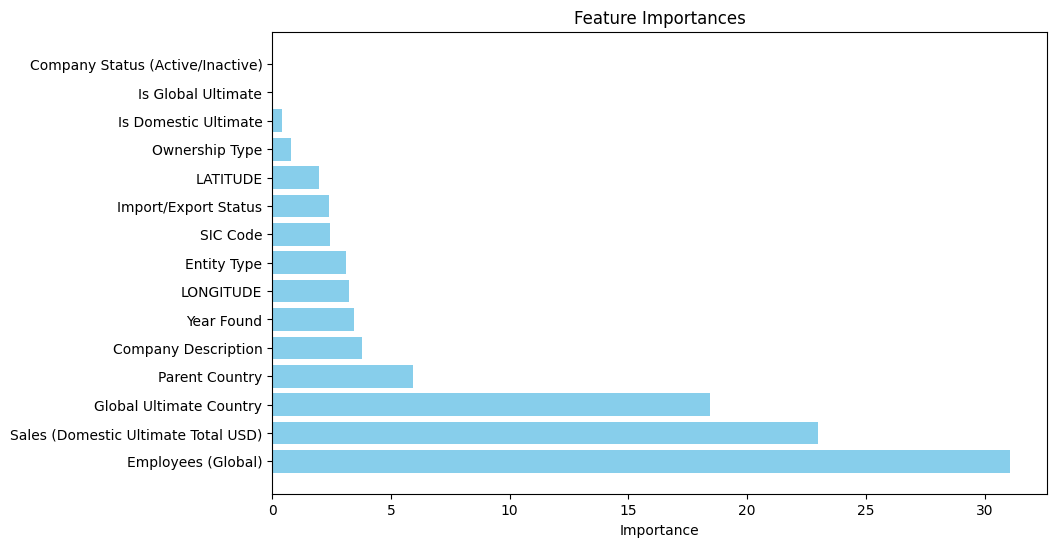

In [184]:
import matplotlib.pyplot as plt


feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature Id'], feature_importance['Importances'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# New section

# Featuring Selection using ML


In [16]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostRegressor, Pool
target_column = "Sales (Global Ultimate Total USD)"  # Change this to your target column

# Separate features and target
X = dataset.drop(columns=[target_column])
y = dataset[target_column]



# Webscraping + Sentiment Analysis

In [ ]:
#Web scraping to generate sentiment analysis
#export scraped data here and do LLM functions

# Geospatial Analysis

In [ ]:
!pip3 install geopy

In [ ]:
from geopy.geocoders import Nominatim

#make a function get a country from latitude and longtitude

geolocator = Nominatim(user_agent="my_geocoder")

def get_country(lat, lon):
    if pd.notna(lat) and pd.notna(lon):
        try:
            location = geolocator.reverse((lat, lon), language='en', exactly_one=True)
            if location and 'address' in location.raw and 'country' in location.raw['address']:
                return location.raw['address']['country']
        except Exception as e:
            print(f"Error while reverse geocoding: {e}")
    return None


In [ ]:
print(dataset['LATITUDE'].isnull().sum())
print(dataset['LONGITUDE'].isnull().sum())
#drop empty data rows and save into a seperate dataset for geospatial analysis
geo_dataset = dataset.dropna(subset=['LATITUDE', 'LONGITUDE'])


120
120


In [ ]:
geo_dataset['country'] = dataset.apply(lambda row: get_country(row['LATITUDE'], row['LONGITUDE']), axis=1)

### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [ ]:
###...code...###

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    result = []
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!